# **AP155 Lab Assignment**
## Module 3: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Thoreenz Soldevilla\
_Student No._: 2021-04225\
_Section_: THQ-HX-1

### Submission Information

_Date and Time Submitted (most recent upload)_: 11/22/23, 9:34 AM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Thoreenz Soldevilla

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/30
* Problem 2 - []/70

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(15 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(15 pts.)*

We first implement the libraries needed for the problem needed. In order for us to use trigonometry we have to use the $\tt cmath$ module.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cmath import *

We define $y_n$ as a function $\tt f1()$ that takes $x$ and $N$ as arguments. We then make an array of 1000 points (from 0 to 1000) and use these points to get the values for $y_n$. All these values are to be put into another array $\tt f1ydata$.

In [2]:
def f1(x, N):
    return sin(pi*x/N)*sin(20*pi*x/N) # Defining the function
f1_xdata = np.linspace(0, 1000, 1000) # Creating a discrete set of integers from 0 to 1000.
f1_ydata = [] # Defining the array that will store the values after the function f1 acts upon them.
for i in range(len(f1_xdata)): # Appending the corresponding y-values.
    f1_ydata.append(f1(i, 1000))

We then transform $y_n$ into the frequency domain using the Discrete Fourier Transform (DFT) method. Each frequency corresponds to a certain coefficient $c_k$ that determines its prevalence among the function. This is defined as:
$$c_k = \sum^{N-1}_{n=0}y_{n}\exp{(-i\frac{2\pi{}kn}{N})}$$,
Where $y_n$ is the value from the $\tt f1ydata$ array, and $N$ is the length of the array.

In [3]:
def dft(y):
    N = len(y) # Length of the data array
    c = np.zeros(N//2+1, complex) # Length of the Frequency Domain
    for k in range(N//2+1): 
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N) # Applying DFT to each data point described in f1(x,N)
    return c # Returns the DFT array

Let us compare the time domain and the frequency domain of the function $\tt f1(x,N)$. We first plot the original wave in the time domain.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


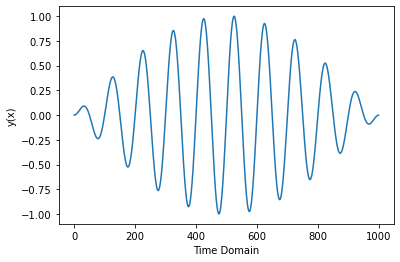

In [4]:
plt.plot(f1_xdata, f1_ydata)
plt.ylabel('y(x)')
plt.xlabel('Time Domain')
plt.show()

Next, we plot the frequency domain.

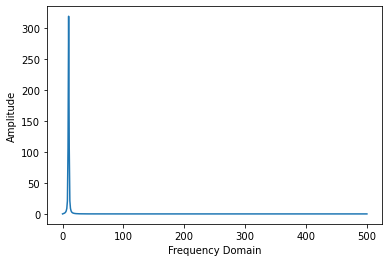

In [5]:
plt.plot(np.abs(dft(f1_ydata)))
plt.xlabel('Frequency Domain')
plt.ylabel('Amplitude')
plt.show()

We see that there is a peak within the 0-20th frequency. Let us zoom in on that part. We then indicate the data points that correspond to each discrete frequency.

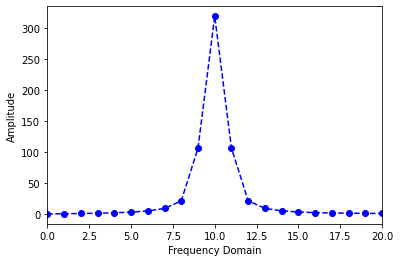

In [6]:
plt.plot(np.abs(dft(f1_ydata)), 'bo--')
plt.xlim(0,20)
plt.xlabel('Frequency Domain')
plt.ylabel('Amplitude')
plt.show()

Since we multiplied a sine wave of frequency 10 with a lower frequency of 1/2, we expect to have the higher frequency increase its amplitude. 

Recall that the fourier transform is able to translate a periodic function into a summation of sine and cosine waves. Here, we see that the function is a summation of waves mainly found within the 1-20 frequency range.

Let us see if we can retrieve the wavefunction with only three main waves. Note that we can retrieve back $y_n$ using $$ y_n = \frac{1}{N}\sum^{N-1}_{k=0}c_{k}\exp{(i\frac{2\pi{}kn}{N})}$$
where $c_k$ is the amplitude coefficient of the dominant waves.

Let us derive the amplitude of the frequencies of the 1-20th range.

In [7]:
f1_ydata_ft = dft(f1_ydata)
f1_ydata_ft[0:20]

array([ 4.42738565e-14  +0.j        , -1.95000266e-14  +0.32645282j,
        5.17427355e-15  +0.69469161j,  3.90909093e-16  +1.16078813j,
        3.06165412e-14  +1.81941714j,  7.75681602e-15  +2.86118021j,
        3.13431193e-14  +4.74138439j, -2.59828780e-14  +8.81897506j,
       -1.84815000e-14 +20.97485977j,  2.67020293e-14+105.88270624j,
        5.47917831e-15-318.50895449j, -2.50875221e-13+105.92274503j,
       -3.40377412e-14 +21.0561576j , -3.01386520e-15  +8.94406678j,
       -2.33181530e-14  +4.91432226j, -2.81214938e-15  +3.08787616j,
        2.12658396e-14  +2.10818122j,  3.88100197e-14  +1.52316082j,
       -2.11859610e-14  +1.14673944j, -1.71089542e-14  +0.89082855j])

We then define a function using three frequencies, that of 9, 10 and 11. Let's define them as:
$$y_m = \frac{1}{N}[c_{9}\exp(\frac{i2\pi(9)m}{N})+
c_{10}\exp(\frac{i2\pi(10)m}{N})+
c_{11}\exp(\frac{i2\pi(11)m}{N})]$$

Looking at the array output above, we can see that the amplitude of frequency 10 is roughly equal to -318.5, while frequencies 9 and 11 consitute an amplitude of 106.

In [111]:
def f2(x, N):
    return (1/N)*(-318.5*exp(2j*pi*10*x/N)+106.0*(exp(2j*pi*9*x/N))+106.0*(exp(2j*pi*11*x/N)))# Defining the function
f2_xdata = np.linspace(0, 1000, 1000) # Creating a discrete set of integers from 0 to 1000.
f2_ydata = [] # Defining the array that will store the values after the function f1 acts upon them.
for i in range(len(f2_xdata)): # Appending the corresponding y-values.
    f2_ydata.append(f2(i, 1000))

We then plot the new $y_m$ and check if it is the same with the initial $y_n$.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


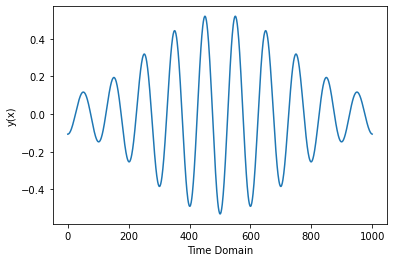

In [112]:
plt.plot(f2_xdata, f2_ydata)
plt.ylabel('y(x)')
plt.xlabel('Time Domain')
plt.show()

We see that $y_m$ can be a good approximation of $y_n$ using only **three** frequencies. Hence, we can infer that:
$$y_n = \sin(\pi n/N) sin(20\pi n/N) \simeq \frac{1}{N}[c_{9}\exp(\frac{i2\pi(9)m}{N})+
c_{10}\exp(\frac{i2\pi(10)m}{N})+
c_{11}\exp(\frac{i2\pi(11)m}{N})$$
sampled at $N=1000$.

### PROBLEM 2

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the Course Pack > Datasets folder).

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(10 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(20 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(10 pts.)*

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(30 pts.)*

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [10]:
dow = np.loadtxt("../dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
```

In [11]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

We plot $\tt dow.txt$ to check the graph.

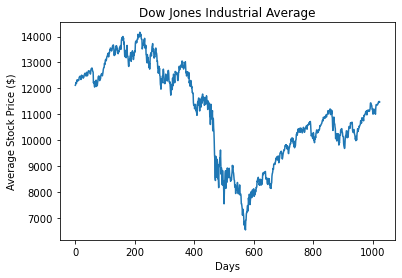

In [12]:
plt.plot(dow)
plt.title('Dow Jones Industrial Average')
plt.xlabel('Days')
plt.ylabel('Average Stock Price ($)')
plt.show()

We see here that the average prices plummeted starting with the 400th day before it rebounded around the 600th day. This reflected the 2007-2008 financial crisis in the United States that was ignited by the downfall of its housing market [1]. 
Let us transform this data into the frequency domain using the fast fourier transform module in numpy. We use the function $\tt rrft$.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


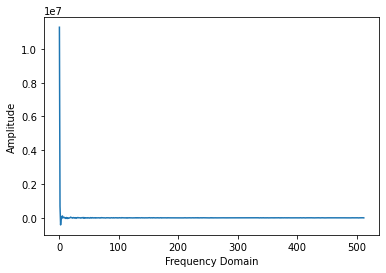

In [13]:
dow_ft = np.fft.rfft(dow)
plt.plot(dow_ft)
plt.ylabel('Amplitude')
plt.xlabel('Frequency Domain')
plt.show()

We then clean 90% of the data starting from its 'tail'.

In [94]:
def clean_stock(percent):
    dow_ft_2 = np.copy(dow_ft) # Copying FFT data into new array
    for i in range(int(len(dow_ft_2)*(percent/100))): # Defining the percent range
        ind = -i-1 # Starting index of [-1] and subsequent subtraction of indices
        dow_ft_2[ind] = 0
    dow_2 = np.fft.irfft(dow_ft_2)
    # Displaying the graph
    plt.plot(dow, color='#c754a4') # original data
    plt.plot(dow_2, color='blue') # data applied with fft
    plt.title('Dow Jones Industrial Average')
    plt.xlabel('Days')
    plt.ylabel('Average Stock Price ($)')
    return plt.show()

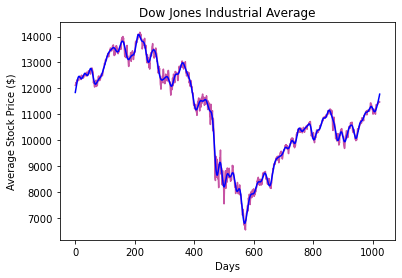

In [95]:
clean_stock(90)

We then retrieve back the data using the inverse fast fourier transform function, described by $\tt irfft$. We plot the initial data at the background and plot the new data on the foreground.

We see that the data is "cleaner" than before. The 90% data points that we cleared coincide with wavefunctions of high frequency but small amplitude. We call them as **white noise**. This helps us retain the salient points of data in a more simple manner.

Let us increase the number of higher frequencies that we will erase, starting with 95% of the data.

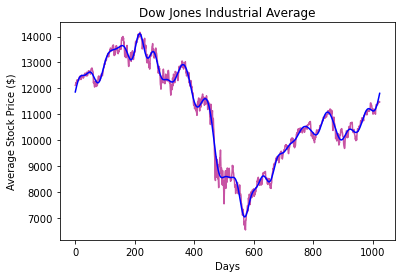

In [97]:
clean_stock(95)

We see that the graph gets smoother. Next, we erase 99% of the data.

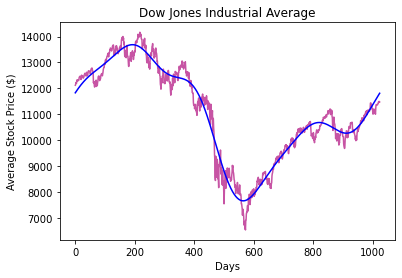

In [98]:
clean_stock(99)

We show here that by increasing the number of white noise in the frequency domain, the graph gets smoother to which it resembles some bounded wave. It can then be described as a summation of sine waves by looking at discrete amplitudes at the frequency domain.

### PROBLEM 3

**Image Deconvolution**

_Refer to Exercise 7.9 of the Newman text_ For this problem, you will use data from a text file called $\tt blur.txt$. It contains a grid of values representing brightness on a black-and-white photo-- a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width $\sigma = 25$. 

1. Use numpy's $\tt loadtxt$ to load the grid of values into a two-dimensional array of real numbers, e.g.:

In [16]:
blur = np.loadtxt("blur.txt")
blur

array([[672.56065, 672.34187, 672.13208, ..., 673.27256, 673.02586,
        672.7886 ],
       [682.04729, 681.85582, 681.67331, ..., 682.67747, 682.45793,
        682.24793],
       [691.51404, 691.34926, 691.19339, ..., 692.06431, 691.87135,
        691.688  ],
       ...,
       [644.1248 , 643.82057, 643.52537, ..., 645.09204, 644.76053,
        644.43811],
       [653.58515, 653.30996, 653.0438 , ..., 654.46568, 654.16296,
        653.86946],
       [663.0685 , 662.8218 , 662.58412, ..., 663.86389, 663.58944,
        663.32434]])

 
Plot the values on the screen of the computer as a density plot. (Hint: Use $\tt imshow$ and $\tt show$ from the pylab package.) You should see the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.) *(10 pts.)*

2. Create an array of the point spread function (PSF), of the same size as the photo, based on the Gaussian function $f(x,y) = exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$. In particular, get the sum of 4 Gaussians with $\sigma = 25$ centered on each of the four corners of the image. _Refer to the figure on page 325 of the Newman text._ *(10 pts.)*

3. Make a density plot of these values on the screen, so that you get a visualization of your point spread function. *(10 pts.)*

3. Apply Fourier transforms using the functions $\tt rfft2$ and $\tt irfft2$ from numpy's $\tt fft$ package to perform image deconvolution as follows:

* Get Fourier transforms of both the blurred image and the PSF from (1) and (2) 
* Divide one by the other
* Perform an inverse transform to get the unblurred photo
* Display the unblurred photo on the screen

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp. 

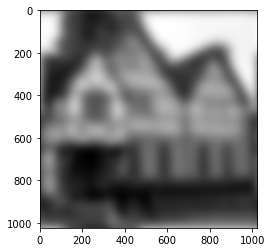

In [102]:
plt.imshow(blur, cmap='gray')

We first define the gaussian function that is dependent on where we indicate the origin and takes any value of $\sigma$.

In [43]:
import math
def gauss(x,y,h,k,sigma):
    return np.exp(-((x-h)**2+(y-k)**2)/(2*sigma**2))

We then create a function that would create a Point Spread Function (PSF) that is dependent on $\sigma$.

In [44]:
def gauss_psf(sigma):
    plot = np.linspace(0,1024,1024) # Collecting values ranging from 0 to 1024
    # Creating four 2D arrays
    gauss_plot_1 = np.zeros((1024,1024))
    gauss_plot_2 = np.zeros((1024,1024))
    gauss_plot_3 = np.zeros((1024,1024))
    gauss_plot_4 = np.zeros((1024,1024))
    # Making the PSF
    for i in range(1024):
        for j in range(1024):
            gauss_plot_1[i][j] = gauss(plot[i],plot[j],0,0,sigma) # PSF centered at (0,0)
            gauss_plot_2[i][j] = gauss(plot[i],plot[j],0,1024,sigma) # PSF centered at (0,1024)
            gauss_plot_3[i][j] = gauss(plot[i],plot[j],1024,0,sigma) # PSF centered at (1024,0)
            gauss_plot_4[i][j] = gauss(plot[i],plot[j],1024,1024,sigma) # PSF centered at (1024,1024)
    gauss_total = (gauss_plot_1 + gauss_plot_2 + gauss_plot_3 + gauss_plot_4)/4 # Getting the average of the four PSF
    return gauss_total 

I created a PSF of $\sigma = 25$ and graphically show its distribution. 

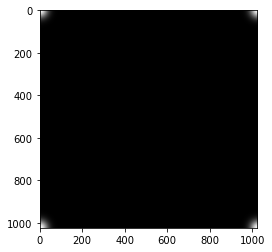

In [103]:
psf_1 = gauss_psf(25.)
plt.imshow(psf_1, cmap='gray')

We then create a function that deconvolutes (or deblurs) the image using 2D fast fourier transform. This is done by  dividing the blurred image with the point spread function to "cancel out" the blur that is presumed to have gaussian distribution.

In [104]:
def deconvo(gauss_total):
    blur_ft = np.fft.rfft2(blur) # Takes the FFT of the blurred image
    gauss_ft = np.fft.rfft2(gauss_total) # Takes the FFT of the PSF
    clear_ft = np.zeros(blur_ft.shape, complex) # Creates a 2D array
    # Dividing the blurred image array by the PSF
    for i_2 in range(1024):
        for j_2 in range(513):
            if gauss_ft[i_2][j_2] > 10e-4:
                clear_ft[i_2][j_2] = (blur_ft[i_2][j_2] / gauss_ft[i_2][j_2])
            else:
                clear_ft[i_2][j_2] = blur_ft[i_2][j_2]
    # Applying inverse FFT to the recalculated image
    clear = np.fft.irfft2(clear_ft)
    return plt.imshow(clear, cmap='gray')

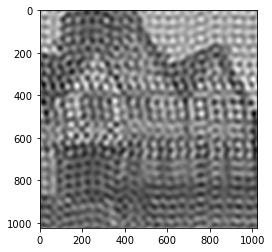

In [105]:
deconvo(psf_1)

We can make out the image of a house! However, we can still do better here by adjusting $\sigma$. We can say that it describes the variance of the PSF. A higher $\sigma$ means a flatter distribution, while a lower one would have a steeper distribution.\
\
Let us create another image using a PSF of $\sigma = 20$.

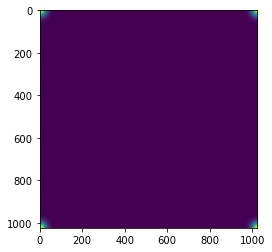

In [51]:
psf_2 = gauss_psf(20.)
plt.imshow(psf_2)

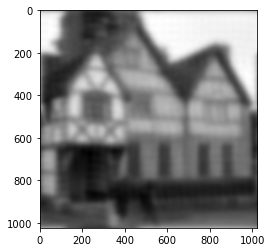

In [106]:
deconvo(psf_2)

We have to go higher a little bit. Let us define another image with PSF of $\sigma = 21$.

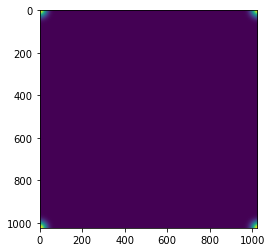

In [54]:
psf_3 = gauss_psf(21.)
plt.imshow(psf_3)

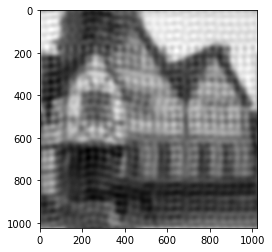

In [107]:
deconvo(psf_3)

Still not done. Let us pick some variance from range 20-21. We define $\sigma = 20.8$.

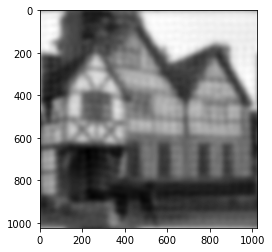

In [108]:
psf_4 = gauss_psf(20.8)
deconvo(psf_4)

This is the closest we may get as to an deblurred image. It is then possible to fix image abberations using fast fourier transform.

Reference:\
[1] https://www.americanprogress.org/article/2008-housing-crisis/ 